In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:
training_data = pd.read_csv('cleaned_training_data.csv') # load data cleaned data

In [45]:
training_data

,review,sentiment,Cont_Spoiler,Cont_End,lemmatization,stemming
0,one reviewers mentioned watching oz episode...,positive,negative,False,one reviewer mentioned watching oz episode you...,one review mention watch oz episod youll hook ...
1,wonderful little production filming techniq...,positive,negative,False,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,thought wonderful way spend time hot summer...,positive,negative,False,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,basically theres family little boy jake thi...,negative,negative,False,basically there family little boy jake think t...,basic there famili littl boy jake think there ...
4,petter matteis love time money visually stu...,positive,negative,False,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...
...,...,...,...,...,...,...
39995,marvelously funny comedy great cast john ri...,positive,negative,False,marvelously funny comedy great cast john ritte...,marvel funni comedi great cast john ritter kat...
39996,plot central characters moving cameras clos...,positive,negative,False,plot central character moving camera closeup f...,plot central charact move camera closeup fact ...
39997,show awesome love actors great story lines ...,positive,negative,False,show awesome love actor great story line chara...,show awesom love actor great stori line charac...
39998,fact movie entitled successful movie switze...,negative,negative,False,fact movie entitled successful movie switzerla...,fact movi entitl success movi switzerland film...


In [6]:
df = training_data[['lemmatization', 'Cont_Spoiler']]

In [55]:
vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(df.lemmatization )


In [57]:
type(X)

scipy.sparse.csr.csr_matrix

In [53]:

y = np.array([1 if Cont_Spoiler=='negative' else 0 for Cont_Spoiler in df.Cont_Spoiler])


In [54]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [52]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(vectorizer.fit_transform(df.lemmatization ))

<ipython-input-52-201a65b08d85>:3: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  X = sm.add_constant(vectorizer.fit_transform(df.lemmatization ))


MemoryError: Unable to allocate 104. GiB for an array with shape (6996880000, 2) and data type int64

In [56]:
logit = sm.Logit(y,X)
results=logit.fit()
print(results.summary())

ValueError: unrecognized data structures: <class 'numpy.ndarray'> / <class 'scipy.sparse.csr.csr_matrix'>

In [47]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
 

model.fit( X, df.Cont_Spoiler )

ValueError: all input arrays must have the same shape

In [43]:
df.Cont_Spoiler.shape

(40000,)

In [16]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [20]:
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :30]:
        print(" %s" % terms[ind])

Cluster 0:
 lemmatization
 cont_spoiler
Cluster 1:
 cont_spoiler
 lemmatization


In [21]:
type(model)

sklearn.cluster._kmeans.KMeans

In [28]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X.index.values
cluster_map['cluster'] = model.labels_

In [29]:
cluster_map

,cluster
0,0
1,1


In [35]:
 model.predict([training_data.lemmatization[0],training_data.Cont_Spoiler[0]  ])

ValueError: Iterable over raw text documents expected, string object received.

TF-IDF 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(training_data.lemmatization)
text = tfidf.transform(training_data.lemmatization)


In [20]:
vectorizer = TfidfVectorizer(max_df=0.95,
                                 min_df=2, stop_words='english')
X = vectorizer.fit_transform(training_data.lemmatization)

In [21]:
feature_names = vectorizer.get_feature_names()





In [22]:
doc = 0
feature_index = X[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [X[doc, x] for x in feature_index])

In [23]:
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print (w, s)

darker 0.08065190979517392
touch 0.05817639839258143
uncomfortable 0.07780419001218107
comfortable 0.07890642356409361
experience 0.05094790000578544
skill 0.0646002764678176
street 0.05652185878722116
lack 0.049351720898853695
bitch 0.08759853741395912
turned 0.05426403808861467
class 0.056745070987716466
middle 0.056335251345722946
mannered 0.09561751013053701
away 0.04163765848994106
order 0.05297091314722253
kill 0.048677516558854154
inmate 0.17719592541411103
nickel 0.1147195358359155
sold 0.07538943474967728
wholl 0.2040212724385459
guard 0.07298690997082967
crooked 0.08968549699360796
injustice 0.08889903368929053
graphic 0.0658535707800265
level 0.05261927503977947
accustomed 0.09561751013053701
got 0.03845564850506188
taste 0.06166007793523802
developed 0.06587714919849412
watched 0.04365907812469305
ready 0.06640760692392982
surreal 0.07253351582273568
nasty 0.06675744041323417
saw 0.03977806009265656
mess 0.059440413368629944
doesnt 0.03650439031746021
charm 0.06357958795100

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


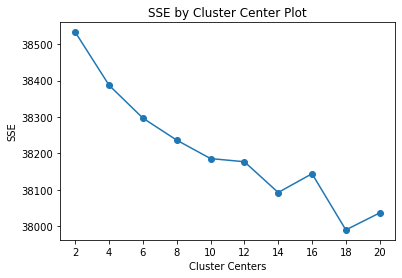

In [26]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [27]:


clusters = MiniBatchKMeans(n_clusters=18, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)



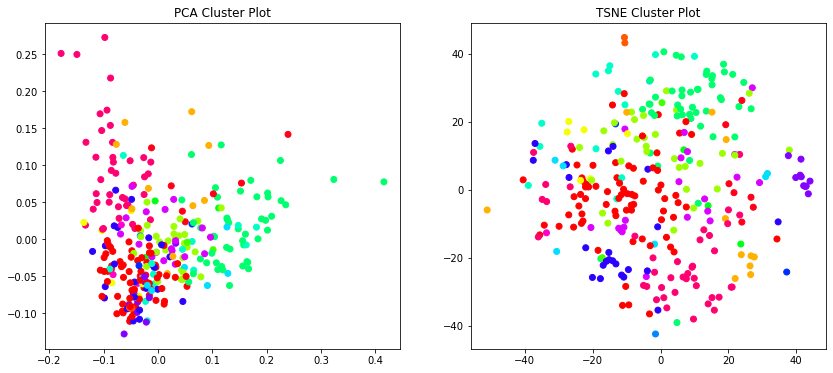

In [28]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)

In [31]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 100)


Cluster 0
audience,bit,minute,version,western,away,try,place,true,classic,later,robert,course,original,piece,music,production,going,series,mr,tv,human,excellent,lot,wife,death,doesnt,script,far,interesting,dvd,turn,long,fact,shot,murder,comedy,acting,short,action,dont,bad,picture,watch,want,documentary,quite,right,black,think,men,point,big,say,better,old,set,really,seen,actor,john,young,know,star,american,day,real,role,director,plot,love,look,thing,cast,end,new,come,great,work,play,little,best,people,performance,woman,world,war,way,year,life,character,good,make,story,man,like,scene,time,movie,film

Cluster 1
cool,need,worth,day,contestant,lot,come,got,let,voice,point,second,didnt,going,big,old,new,life,instead,watch,enemy,isnt,quite,friend,uwe,control,end,minute,love,hour,team,try,mode,world,star,doesnt,guy,fight,series,im,actually,bit,seen,right,want,beat,action,thats,chess,super,fantasy,ive,different,year,little,bad,boll,say,use,pretty,mission,reality,look,scene,final,real,weapon,pl

In [4]:
km = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=1)


In [24]:
km.fit(X)

KMeans(max_iter=100, n_clusters=4, n_init=1)

#Binary Classification -> Spoiler or Not Spoiler


TF-IDF 

1 Calculating DF

In [ ]:
from keras.preprocessing.text import Tokenizer

In [73]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_data.lemmatization)

DF = tokenizer.word_index 

In [74]:
total_vocab_size = len(DF) # unique words

In [75]:
total_vocab_size

175784

In [76]:
total_vocab = [x for x in DF]

In [77]:
total_vocab

['movie',
 'film',
 'one',
 'like',
 'time',
 'good',
 'character',
 'get',
 'even',
 'would',
 'story',
 'make',
 'see',
 'really',
 'scene',
 'much',
 'well',
 'people',
 'great',
 'bad',
 'also',
 'show',
 'first',
 'dont',
 'way',
 'thing',
 'made',
 'could',
 'think',
 'life',
 'go',
 'know',
 'watch',
 'love',
 'many',
 'actor',
 'plot',
 'seen',
 'two',
 'never',
 'say',
 'look',
 'acting',
 'little',
 'end',
 'best',
 'year',
 'ever',
 'take',
 'better',
 'man',
 'come',
 'still',
 'work',
 'part',
 'find',
 'something',
 'want',
 'give',
 'lot',
 'back',
 'director',
 'im',
 'guy',
 'real',
 'watching',
 'doesnt',
 'performance',
 'didnt',
 'play',
 'woman',
 'funny',
 'actually',
 'though',
 'another',
 'nothing',
 'going',
 'u',
 'new',
 'role',
 'every',
 'old',
 'girl',
 'cant',
 'point',
 'feel',
 'thats',
 'world',
 'quite',
 'day',
 'cast',
 'fact',
 'pretty',
 'got',
 'seems',
 'minute',
 'thought',
 'young',
 'around',
 'comedy',
 'horror',
 'big',
 'enough',
 'action

In [78]:
def doc_freq(word):
    c = 0
    try:
        c = DF[word]
    except:
        pass
    return c

In [79]:
doc_freq("end")

45

 Calculating TF-IDF

In [118]:
from nltk.tokenize import word_tokenize

In [80]:
N = len (training_data.lemmatization)

In [145]:
doc = 0

tf_idf = {}

for i in range(1):
    tokens = [] 
    
    text = training_data.lemmatization[i]
    tokens.append(word_tokenize(str(text)))
    
    
    
    counter = Counter(list(tokens)
    words_count = len(text )
    print (counter)
    for token in np.unique(tokens):
        
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log((N+1)/(df+1))
        
        tf_idf[doc, token] = tf*idf

    doc += 1
    

TypeError: unhashable type: 'list'

In [143]:
tf_idf

{(0, 'accustomed'): 0.0,
 (0, 'agenda'): 0.0,
 (0, 'agreement'): 0.0,
 (0, 'appeal'): 0.0,
 (0, 'around'): 0.0,
 (0, 'audience'): 0.0,
 (0, 'away'): 0.0,
 (0, 'awayi'): 0.0,
 (0, 'become'): 0.0,
 (0, 'bitch'): 0.0,
 (0, 'brutality'): 0.0,
 (0, 'called'): 0.0,
 (0, 'cell'): 0.0,
 (0, 'charm'): 0.0,
 (0, 'christian'): 0.0,
 (0, 'city'): 0.0,
 (0, 'class'): 0.0,
 (0, 'classic'): 0.0,
 (0, 'comfortable'): 0.0,
 (0, 'couldnt'): 0.0,
 (0, 'crooked'): 0.0,
 (0, 'dare'): 0.0,
 (0, 'darker'): 0.0,
 (0, 'dealing'): 0.0,
 (0, 'death'): 0.0,
 (0, 'developed'): 0.0,
 (0, 'dodgy'): 0.0,
 (0, 'doesnt'): 0.0,
 (0, 'drug'): 0.0,
 (0, 'due'): 0.0,
 (0, 'em'): 0.0,
 (0, 'emerald'): 0.0,
 (0, 'episode'): 0.0,
 (0, 'ever'): 0.0,
 (0, 'exactly'): 0.0,
 (0, 'experience'): 0.0,
 (0, 'experimental'): 0.0,
 (0, 'face'): 0.0,
 (0, 'fact'): 0.0,
 (0, 'faint'): 0.0,
 (0, 'far'): 0.0,
 (0, 'first'): 0.0,
 (0, 'focus'): 0.0,
 (0, 'forget'): 0.0,
 (0, 'front'): 0.0,
 (0, 'gangsta'): 0.0,
 (0, 'get'): 0.0,
 (0, 'given

In [129]:
def matching_score(k, query): 
    tokens = word_tokenize(str(query))

    print("Matching Score")
    print("\nQuery:", query)
    print("")
    print(tokens)
    
    query_weights = {}

    for key in tf_idf:
        
        if key[1] in tokens:
            try:
                query_weights[key[0]] += tf_idf[key]
            except:
                query_weights[key[0]] = tf_idf[key]
    
    query_weights = sorted(query_weights.items(), key=lambda x: x[1], reverse=True)

    print("")
    
    l = []
    
    for i in query_weights[:10]:
        l.append(i[0])
    
    print(l)
    

matching_score(10, "Without the drive of Rebeccah's insistence, Kate lost her momentum. She stood next a slatted oak bench, canisters still clutched, surveying")

Matching Score

Query: Without the drive of Rebeccah's insistence, Kate lost her momentum. She stood next a slatted oak bench, canisters still clutched, surveying

['Without', 'the', 'drive', 'of', 'Rebeccah', "'s", 'insistence', ',', 'Kate', 'lost', 'her', 'momentum', '.', 'She', 'stood', 'next', 'a', 'slatted', 'oak', 'bench', ',', 'canisters', 'still', 'clutched', ',', 'surveying']

[2, 4, 7, 10, 11, 16, 21, 22, 30, 31]


In [122]:


for i in range(N):
     
    
    


In [88]:
from collections import Counter

In [110]:
tokenizer = Tokenizer()
stri = [training_data.lemmatization[0]]
tokens = tokenizer.fit_on_texts(stri)
tokens

In [113]:
type(tokens)

NoneType

In [111]:
tokenizer.word_index

{'oz': 1,
 'violence': 2,
 'show': 3,
 'prison': 4,
 'forget': 5,
 'watching': 6,
 'episode': 7,
 'right': 8,
 'first': 9,
 'struck': 10,
 'go': 11,
 'city': 12,
 'high': 13,
 'say': 14,
 'due': 15,
 'wholl': 16,
 'inmate': 17,
 'get': 18,
 'one': 19,
 'reviewer': 20,
 'mentioned': 21,
 'youll': 22,
 'hooked': 23,
 'exactly': 24,
 'happened': 25,
 'methe': 26,
 'thing': 27,
 'brutality': 28,
 'unflinching': 29,
 'scene': 30,
 'set': 31,
 'word': 32,
 'trust': 33,
 'faint': 34,
 'hearted': 35,
 'timid': 36,
 'pull': 37,
 'punch': 38,
 'regard': 39,
 'drug': 40,
 'sex': 41,
 'hardcore': 42,
 'classic': 43,
 'use': 44,
 'wordit': 45,
 'called': 46,
 'nickname': 47,
 'given': 48,
 'oswald': 49,
 'maximum': 50,
 'security': 51,
 'state': 52,
 'penitentary': 53,
 'focus': 54,
 'mainly': 55,
 'emerald': 56,
 'experimental': 57,
 'section': 58,
 'cell': 59,
 'glass': 60,
 'front': 61,
 'face': 62,
 'inwards': 63,
 'privacy': 64,
 'agenda': 65,
 'em': 66,
 'home': 67,
 'manyaryans': 68,
 'musli

In [115]:
counter = Counter(tokenizer)
words_count = len(tokenizer)

TypeError: 'Tokenizer' object is not iterable

In [90]:
counter

Counter()

In [ ]:
tf_idf = {}
for i in range(N):
    tokenizer = Tokenizer()
    tokens = tokenizer.fit_on_texts(training_data.lemmatization[i])
    counter = Counter(tokens + processed_title[i])
    for token in np.unique(tokens):
        tf = counter[token]/words_count
        df = doc_freq(token)
        idf = np.log(N/(df+1))
        tf_idf[doc, token] = tf*idf

Clustering unsupervised k-Means

In [14]:
training_data = pd.read_csv('cleaned_training_data.csv') # load data cleaned data

In [32]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(training_data.review )

In [33]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [34]:
terms

['aa',
 'aaa',
 'aaaaaaaaaaaahhhhhhhhhhhhhh',
 'aaaaaaaargh',
 'aaaaaaahhhhhhggg',
 'aaaaagh',
 'aaaaah',
 'aaaaarrrrrrgggggghhhhhh',
 'aaaaatchkah',
 'aaaaaw',
 'aaaahhhhhh',
 'aaaahhhhhhh',
 'aaaand',
 'aaaarrgh',
 'aaaawwwwww',
 'aaaggghhhhhhh',
 'aaaghi',
 'aaah',
 'aaahthe',
 'aaall',
 'aaand',
 'aaargh',
 'aaarghhow',
 'aaarrrghim',
 'aaaugh',
 'aab',
 'aada',
 'aadha',
 'aadmittedly',
 'aag',
 'aage',
 'aaghh',
 'aah',
 'aahed',
 'aahemy',
 'aahhh',
 'aahhhh',
 'aahing',
 'aaila',
 'aailiyah',
 'aaip',
 'aaja',
 'aajala',
 'aak',
 'aakash',
 'aake',
 'aaker',
 'aakrosh',
 'aalcc',
 'aaliyah',
 'aaliyahs',
 'aames',
 'aamesthe',
 'aamilne',
 'aamir',
 'aamirs',
 'aamirsalmanraveenakarishma',
 'aamr',
 'aan',
 'aankh',
 'aankhen',
 'aaoon',
 'aap',
 'aapke',
 'aapkey',
 'aaran',
 'aardman',
 'aardmans',
 'aardmanthe',
 'aardvark',
 'aardvarks',
 'aarf',
 'aargh',
 'aarghlets',
 'aarika',
 'aaron',
 'aarona',
 'aaronanchors',
 'aaroncurb',
 'aaronjd',
 'aarons',
 'aarp',
 'aarrrgh'

In [20]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [19]:
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X )

KMeans(max_iter=100, n_clusters=2, n_init=1)

In [ ]:
for index, row in training_data.iterrows():
    if row['Cluster'] is not "KMeans(n_clusters=2)":        
        print(row['Cluster'] )